# **mlops**

In [ ]:
import pandas as pda
import matplotlib.pyplot as plt
import numpy as np
d = pda.read_csv("/content/Real estate.csv")
d.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
d.shape

(414, 8)

In [ ]:
d.isna().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [ ]:
d.corr()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


<Axes: >

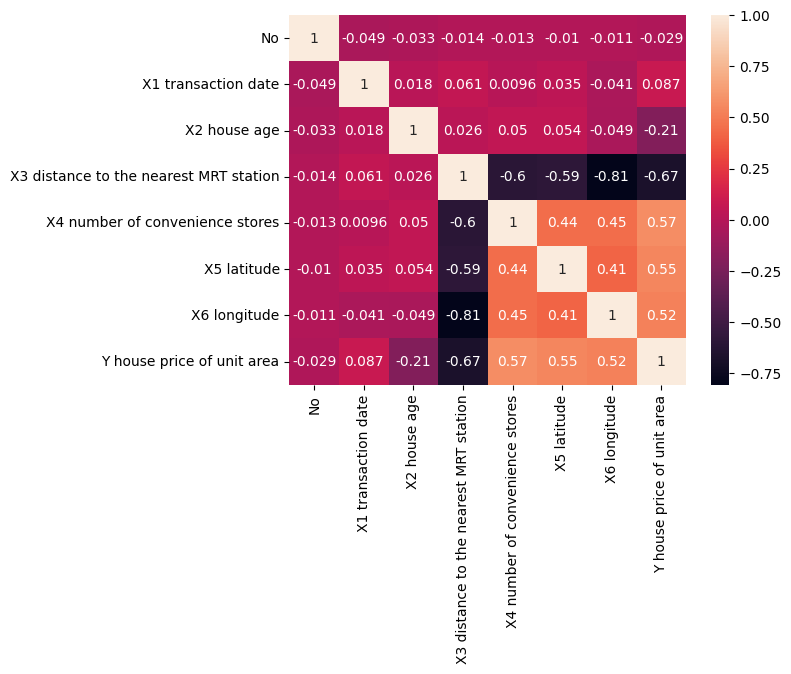

In [ ]:
import seaborn as sns
sns.heatmap(d.corr(),annot=True)

In [ ]:
x=d.iloc[:,:-1]
y=d.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression
rg=LinearRegression()
rg.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_predict=rg.predict(x_test)

In [ ]:
rg.coef_,rg.intercept_

(array([-4.15431832e-03,  4.00786710e+00, -2.30222068e-01, -4.20874721e-03,
         1.18429933e+00,  2.20589799e+02, -4.59046240e+00]),
 -12976.12079795298)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.5420277763711656

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
p=PolynomialFeatures(degree=6)
x_poly=p.fit_transform(x)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_poly,y)

LinearRegression()

In [ ]:
#R2_SCORE & MSE
from sklearn.metrics import r2_score,mean_squared_error
print(mean_squared_error(y,lr.predict(x_poly)))
r2_score(y,lr.predict(x_poly))

5.54582766405568


0.9699721254645136

In [ ]:
import pickle
model_pkl_file = "/content/pickel.pkl"

with open(model_pkl_file, 'wb') as file:
    pickle.dump(rg, file)

In [ ]:
import pickle as pk
model_pkl_file="/content/pickel.pkl"


with open(model_pkl_file, 'rb')as pk_f:
  rg = pk.load(pk_f)

In [ ]:
k = pickle.load(open("/content/pickel.pkl", 'rb'))

# **automl**

In [ ]:
pip install --pre pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 78.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 21.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 75.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 52.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.3

In [ ]:
import pandas as pd
d=pd.read_csv("/content/Real estate.csv")

In [ ]:
from pycaret.regression import *
s=setup(d,target='Y house price of unit area')

In [ ]:
best=compare_models()

In [ ]:
final_model=finalize_model(best)
pred=predict_model(final_model,data=d)
pred

In [ ]:
pip install tpot

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from tpot import TPOTRegressor
from sklearn.metrics import r2_score

# Load your dataset
d = pd.read_csv('/content/Real estate.csv')  # Update this path according to your file location

# Separate features and target variable
from sklearn.model_selection import train_test_split
X = d.iloc[:, 4:6]  # Features
y = d.iloc[:, -1]   # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Initialize TPOT regressor
tpot = TPOTRegressor(generations=5, population_size=20, verbosity=2, random_state=42)  # You can adjust generations and population_size

# Train the TPOT model
tpot.fit(X_train, y_train)

# Make predictions
predictions = tpot.predict(X_test)

# Evaluate the model
print("R2 score:", r2_score(y_test, predictions))


In [ ]:
!pip install gradio

In [ ]:

import pandas as pd
import numpy as np
import gradio as gr
d=pd.read_csv('/content/Real estate.csv')
import gradio as gr
# Define the function to make predictions
def predict_polynomial_regression(feature1, feature2, feature3, feature4, feature5,feature6):
  # Transform input features into polynomial features
  x = pd.DataFrame([[feature1, feature2, feature3, feature4, feature5, feature6]],columns=["X1 transaction date", "X2 house age", "X3 distance to the nearest MRT station","X4 number of convenience stores", "X5 latitude" , "X6 longitude"])
  x_poly = p.transform(x)
  # Make prediction using the trained model
  prediction = rg.predict(x_test)
  return prediction[0]
# Create the Gradio interface
inputs = [gr.Textbox(label="X1 transaction date"),
gr.Textbox(label='X2 house age'),
gr.Textbox(label='X3 distance to the nearest MRT station'),
gr.Textbox(label='X4 number of convenience stores'),
gr.Textbox(label='X5 latitude'),
gr.Textbox(label='X6 longitude')]
output_text = gr.Textbox(label="Y house price of unit area")
#Deploy the model
gr.Interface(fn=predict_polynomial_regression, inputs=inputs, outputs=output_text,

title="ML PREDICTION").launch()
